# Lunar Phase Predictions

This notebook uses the https://www.weatherapi.com/ API to retreive the tide levels for Phoenix, AZ.  


In [12]:
from datetime import datetime
import dateutil
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib notebook

## Retrieve Data

In [27]:
predictions = []
    
payload = {
    'key': 'ba62fee581bc4e268cc195804211510',
    'q': 'phoenix',
    'dt': '2023-10-15',
}

date = datetime.strptime('2021-10-31', '%Y-%m-%d')
for i in range(30 * 12):
    date = date + dateutil.relativedelta.relativedelta(days=1)
    print('Retrieving data for', date.strftime('%Y-%m-%d'))
    payload['dt'] = date.strftime('%Y-%m-%d')
    r = requests.get('http://api.weatherapi.com/v1/astronomy.json', params=payload)
    predictions.append([payload['dt'], json.loads(r.text)['astronomy']['astro']['moon_phase']])


Retrieving data for 2021-11-01
Retrieving data for 2021-11-02
Retrieving data for 2021-11-03
Retrieving data for 2021-11-04
Retrieving data for 2021-11-05
Retrieving data for 2021-11-06
Retrieving data for 2021-11-07
Retrieving data for 2021-11-08
Retrieving data for 2021-11-09
Retrieving data for 2021-11-10
Retrieving data for 2021-11-11
Retrieving data for 2021-11-12
Retrieving data for 2021-11-13
Retrieving data for 2021-11-14
Retrieving data for 2021-11-15
Retrieving data for 2021-11-16
Retrieving data for 2021-11-17
Retrieving data for 2021-11-18
Retrieving data for 2021-11-19
Retrieving data for 2021-11-20
Retrieving data for 2021-11-21
Retrieving data for 2021-11-22
Retrieving data for 2021-11-23
Retrieving data for 2021-11-24
Retrieving data for 2021-11-25
Retrieving data for 2021-11-26
Retrieving data for 2021-11-27
Retrieving data for 2021-11-28
Retrieving data for 2021-11-29
Retrieving data for 2021-11-30
Retrieving data for 2021-12-01
Retrieving data for 2021-12-02
Retrievi

Retrieving data for 2022-07-24
Retrieving data for 2022-07-25
Retrieving data for 2022-07-26
Retrieving data for 2022-07-27
Retrieving data for 2022-07-28
Retrieving data for 2022-07-29
Retrieving data for 2022-07-30
Retrieving data for 2022-07-31
Retrieving data for 2022-08-01
Retrieving data for 2022-08-02
Retrieving data for 2022-08-03
Retrieving data for 2022-08-04
Retrieving data for 2022-08-05
Retrieving data for 2022-08-06
Retrieving data for 2022-08-07
Retrieving data for 2022-08-08
Retrieving data for 2022-08-09
Retrieving data for 2022-08-10
Retrieving data for 2022-08-11
Retrieving data for 2022-08-12
Retrieving data for 2022-08-13
Retrieving data for 2022-08-14
Retrieving data for 2022-08-15
Retrieving data for 2022-08-16
Retrieving data for 2022-08-17
Retrieving data for 2022-08-18
Retrieving data for 2022-08-19
Retrieving data for 2022-08-20
Retrieving data for 2022-08-21
Retrieving data for 2022-08-22
Retrieving data for 2022-08-23
Retrieving data for 2022-08-24
Retrievi

In [28]:
phase = {
    "New Moon": 1,
    "Waxing Crescent": 2,
    "First Quarter": 3,
    "Waxing Gibbous": 4,
    "Full Moon": 5,
    "Waning Gibbous": 6,
    "Last Quarter": 7,
    "Waning Crescent": 8,
}
values = list(map(lambda x: float(phase[x[1]]), predictions))
dates = list(map(lambda x: datetime.strptime(
    x[0], '%Y-%m-%d'), predictions))

## Plot Results

<IPython.core.display.Javascript object>


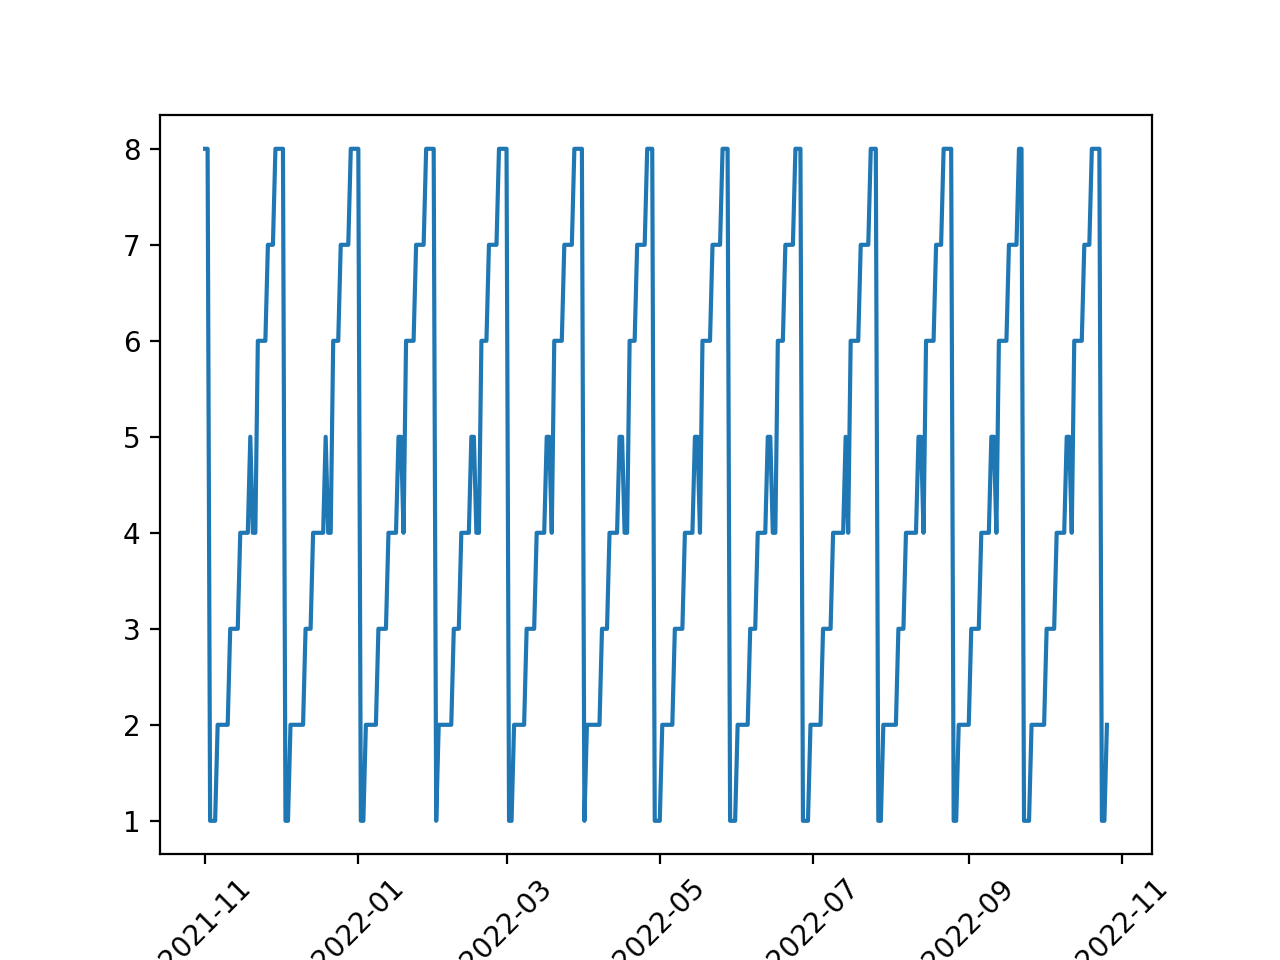

In [29]:
plt.plot(dates, values)
plt.xticks(rotation=45)
plt.show()

## Save Observations

In [22]:
dataset = pd.DataFrame({'DateTime': dates, 'Height': values})
dataset.to_csv('tidelevels_9414863.csv', index=False)